1. Improving a model's performance by tuning it's parameters.
2. Finding he values of the important parameters of a model(provide best generalization) is a tricky task, but necessary for almost all models and datasets.
3. Because it is such a common task, there are standard methods in scikit learn to help us with it.
4. The most commonly used method is the **Grid Search** method which means trying all possible combinations of the parameters interest.

* Consider the case of Kernel SVM with an RBF(radial basis function) kernel.
* There are 2 important parameters: the kernel bandwidth, gamma, and the regularization parameter, C.
* Say we want to try the values 0.001, 0.01, 0.1, 1, 10, 100 for the parameter C and same for gamma.
* Because we have siz different setting for C and gamma that we want to try, we have 36 combinations of parameters in total.

## Simple Grid Search

* Implementing a simple grid search just as 'for' loops over the 2 parameters, training and evaluating a classifier for each combination.


In [1]:
# Naive Grid Search Implementation

from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print("Size of training set: {} Size of testing set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:

    # For each combination of parameters, Train and SVC
    svm = SVC(gamma=gamma, C=C)
    svm.fit(X_train, y_train)

    # Evaluate the SVC on the test set
    score = svm.score(X_test, y_test)

    # If we get a better score, store the score and the parameters.
    if score > best_score:
      best_score = score
      best_parametrs = {'C': C, 'gamma': gamma}

print("Best Score: {:.2f}".format(best_score))
print("Best Parameters: {}".format(best_parametrs))

Size of training set: 112 Size of testing set: 38
Best Score: 0.97
Best Parameters: {'C': 100, 'gamma': 0.001}


### The Danger of Overfitting the Parameters and the Validation Set

* Given the result, we will be tempted to report that we found a model with 97% accuracy on our dataset.
* This claim would be overly optimistic(or just wrong), for the following reason:

  1. We triend many different parameters and selected the one with best accuracy on the test set, but this accuracy won't neccessarily carry over the new data.
  2. Because we used the test data to adjust the parameters, we can no longer use it to assess how good the model is.
  3. This is the same reason why we need to split the data into training and test sets in the first place; we need an independent dataset to evaluate, one that was not used to create the model.

* One way to resolve this problem is to split the data again, so we have three datasets: training set to build the model, the validation (or development) set to select the parameters of the model, and the test set to evaluate the performance of the selected parameters.

     |████████████████████████████████| 542kB 4.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=ce44c6dc7204a57fa89b36e978ea0d901813c5ec8867b7f62618bbe45d1fe6af
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


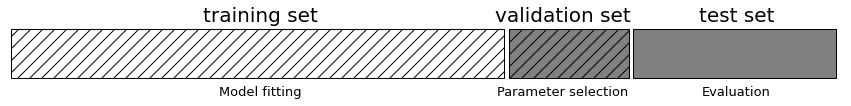

In [2]:
!pip install mglearn
import mglearn

mglearn.plots.plot_threefold_split()

1. After selecting the best parameters using the validation set, we can rebuild a model using the parameter settings we found, but now training on both the training data and the validation data. 

2. This way we can use as much data as possible to build our model.

In [5]:
from sklearn.svm import SVC

# Split the data into training + validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# Splitting training+validation data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {} Size of validation set: {}  Size of test set: {}\n".format(X_train.shape[0], X_valid.shape[0],
                                                                                           X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:

    # For each combination of parameters, Train and SVC
    svm = SVC(gamma=gamma, C=C)
    svm.fit(X_train, y_train)
  
    # Evaluate the SVC on the test set
    score = svm.score(X_test, y_test)

    # If we get a better score, store the score and the parameters.
    if score > best_score:
      best_score = score
      best_parametrs = {'C': C, 'gamma': gamma}

# Rebuild the model on the combined training and validation set, and evaluate on the test set
svm = SVC(**best_parametrs)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on Validation set: {:.2f}".format(best_score))
print("Best Parameters: ", best_parametrs)
print("Test score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 Size of validation set: 28  Size of test set: 38

Best score on Validation set: 0.97
Best Parameters:  {'C': 100, 'gamma': 0.001}
Test score with best parameters: 0.97


1. The best score in this case is equal to the earlier score but mostly it is below the earlier score, because we use less data to train the model. (X_train is smaller now because we split our dataset twice.)

2. But the test score which tells us how we generalize is also the same but mostly it is lower (92%). 

3. Distinction between the 3 sets is fundamentally important for applying machine learning methods in practice.

4. Any choices made based on the test set accuracy "leak" information from the test set into the model.

5. Therefore it is important to keep a seperate test set, which is only used for the final evaluation.

6. **It is a good practice to do all exploratory analysis and model selection using the training and validation set, and reserve the testing set for the final evaluation, this is even true for exploratory visualization.**

7. Evaluating more than one model on the test set and choosing the better of the 2 will result in an overly optimistic estimate of how accurate the model is.